In [4]:
import matplotlib.pyplot as plt
import numpy as np

# Supervised Machine Learning: Regression and Classification 

## Week 1: Introduction to machine learning

### What is machine learning?

Definition:

*"Field of study that gives computers the ability to learn without being 
explicitly programmed."* - Arthur Samuel (1959)

There are two main types of machine learning:
* Supervised learning.
* Unsupervised learning.

### Supervised learning

Key characteristics:
* The aim is to map an input, $x$, to an output, $y$.
* You give your learning algorithm examples to learn from.
* The learning algorithm then learns to predict an output from an input.

Two main types of supervised learning:
* **Regression**: Fitting a curve to data, mapping inputs to outputs.
* **Classification**: Deciding what category something belongs to based on a set
of inputs.


Regression examples:
* Spam filtering.
* Audio to text transcripts (speech recognition).
* Language translation.
* (advertisement, user info) -> will a user click (0, 1).
* visual inspection.

Classification examples:
* Tumour identification.

### Unsupervised learning

For example, consider we have classification of tumour types based on prior data
on types and classifiers, *e.g.* age and tumour size. In unsupervised learning,
we would not have the prior *"right answers"*; the algorithm would have to spot
patterns by itself - this is known as **clustering**.

Three main types of unsupervised learning:
* **Clustering**
* **Anomaly Detection**
* (TBC)

Clustering examples:
* News aggregation.
* Mapping genes to traits.
* Market segmentation.

### Linear regression

Linear regression is a basic type of supervised learning where the aim is to fit
a straight lint to some data.
Regression models predict *numbers* (whereas classification models predict
*categories*.) Accordingly, classification models have a finite / countable set
of outputs, whereas regression models can have infinite (continuous) outputs.

The initial "right answers" used to train a linear regression are known as a
**training set**.

Notation:
* $x$: **Input variable** (also known as a **feature**).
* $y$: **Output variable**, also known as a **target variable**.
* $m$: **Number of training examples**.
* $(x, y)$: A single training example.
* $(x^{(i)}, y^{(i)})$: The $i$<sup>th</sup> training example.

To train the model, we feed the training set (inputs and outputs) into your
learning algorithm (*e.g.* linear regression in this case) to create a
**function**, $f$, also known as a **hypothesis**, or a **model**.

The function, $f$, then takes some input, $x$ and gives a **prediction** (or
**estimate**), $\hat{y}$.

Note that a "bare" $y$ refers to the **target** which is the *true value*.

For **univariate linear regression** (linear regression in a single variable):
$$f_{w,b}(x) = wx + b$$
Note that $f_{w,b}(x)$ is often shortened to $f(x)$.

Notation:
* $w$: The **weight** (aka the *slope*).
* $b$: The **bias** (aka the *intercept*, or $y$*-intercept*).
* $\boldsymbol{x}$: A *bold* value denotes a **vector** – *e.g.* all the
$x$-values.
Taken together, $w$ and $b$ are the **parameters** of the model. They may also
be refered to collectively as **coefficients** or **weights**.

Note that $f(x)$ may be more completely written as $f_{w,b}(x^{(i)})$.

For a given input, the prediction is given by:
$$ \hat{y}^{(i)} = f_{w,b}(x^{(i)}) $$
where
$$f_{w,b}(x^{(i)}) = wx^{(i)} + b$$

Our aim in linear regression is to find values for $w$ and $b$ so that
$\hat{y}^{(i)}$ is close to $y^{(i)}$ for all $(x^{(i)}, y^{(i)})$.

To do this, we need to introduce a **cost function**, $J$, which measures how
well a line fits the training data. For our parameters, the cost function is,
more specifically, $J(w, b)$.

For a given prediction, the **error** is given by $\hat{y}^{(i)} - y^{(i)}$.

So that we work with positive values, we consider instead the squared error, and
so that we normalize, we consider the mean of this over all training examples.
Thus, our cost function is the **mean squared error**, or **MSE**. Note that we
divide by a factor of $2m$, and not $m$, which is by convention.
$$J(w, b) = \frac{1}{2m}\sum_{i=1}^{m}(\hat{y}^{(i)} - y^{(i)})^2$$
Thus:
$$J(w, b) = \frac{1}{2m}\sum_{i=1}^{m}(f_{(w,b)}(x^{(i)}) - y^{(i)})^2$$

Our goal, therefore, is to minimize our cost function, *i.e.*:
$$\underset{w, b}{\text{min}}\;J(w,b)$$

Let's take a simpler example, where we assume the intercept is zero, giving:
$$J(w) = \frac{1}{2m}\sum_{i=1}^{m}(f_{(w)}(x^{(i)}) - y^{(i)})^2$$
$$J(w) = \frac{1}{2m}\sum_{i=1}^{m}(wx^{(i)} - y^{(i)})^2$$

Suppose we have the following training set:
| $x$ | $y$ |
|----:|----:|
| 1   | 1   |
| 2   | 2   |
| 3   | 3   |

We can plot the values of $J(w)$ as a function of $w$:

Text(0, 0.5, '$J(w)$')

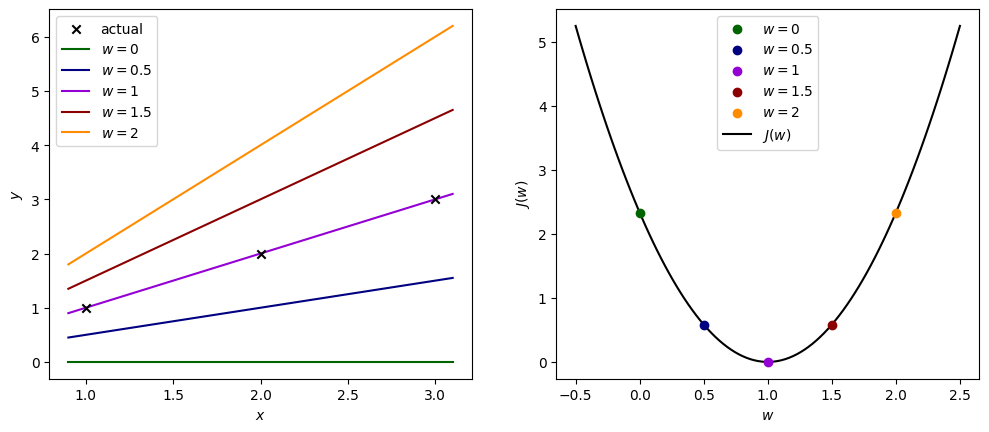

In [ ]:
x = np.array([1, 2, 3])
y = np.array([1, 2, 3])


def J_w(x: np.ndarray, y: np.ndarray, w: float) -> np.float64:
    squared_diff = np.square(x * w - y)
    return (1 / (2 * x.shape[0])) * np.sum(squared_diff, axis=0)


def J_w_vectorized(x: np.ndarray, y: np.ndarray, w: np.ndarray) -> np.float64:
    squared_diff = np.square(x[:, None] * w[None, :] - y[:, None])
    return (1 / (2 * x.shape[0])) * np.sum(squared_diff, axis=0)


fig, axs = plt.subplots(nrows=1, ncols=2)

# Actual values
axs[0].scatter(x=x, y=y, marker="x", color="k", label="actual")

# Plot lines and J(w) for various values of w
pred_x = np.array(axs[0].get_xlim())
pred_w = {0: "darkgreen", 0.5: "navy", 1: "darkviolet", 1.5: "darkred", 2: "darkorange"}
for w, color in pred_w.items():
    pred_y = w * pred_x
    axs[0].plot(pred_x, pred_y, color=color, label=f"$w={w}$", zorder=0)
    axs[1].scatter(x=w, y=J_w(x, y, w), marker="o", color=color, label=f"$w={w}$")

# Plot J(w) as a line
w_n = 100
w_lim = (-0.5, 2.5)
w_vec = np.linspace(*w_lim, w_n)
j_w = J_w_vectorized(x, y, w_vec)
axs[1].plot(w, j_w, color="k", label="$J(w)$", zorder=0)

# Formatting and labels
fig.set_figwidth(12)
axs[0].legend()
axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$y$")
axs[1].legend()
axs[1].set_xlabel("$w$")
axs[1].set_ylabel("$J(w)$")

For the above example, it is clear that the function $J(w)$ is minimized when $w = 1$.

Now, let's consider a more advanced case where we have both *weight* and *bias*.



[Text(0.5, 0, '$w$'), Text(0.5, 0.5, '$b$'), Text(0.5, 0, '$J(w,b)$')]

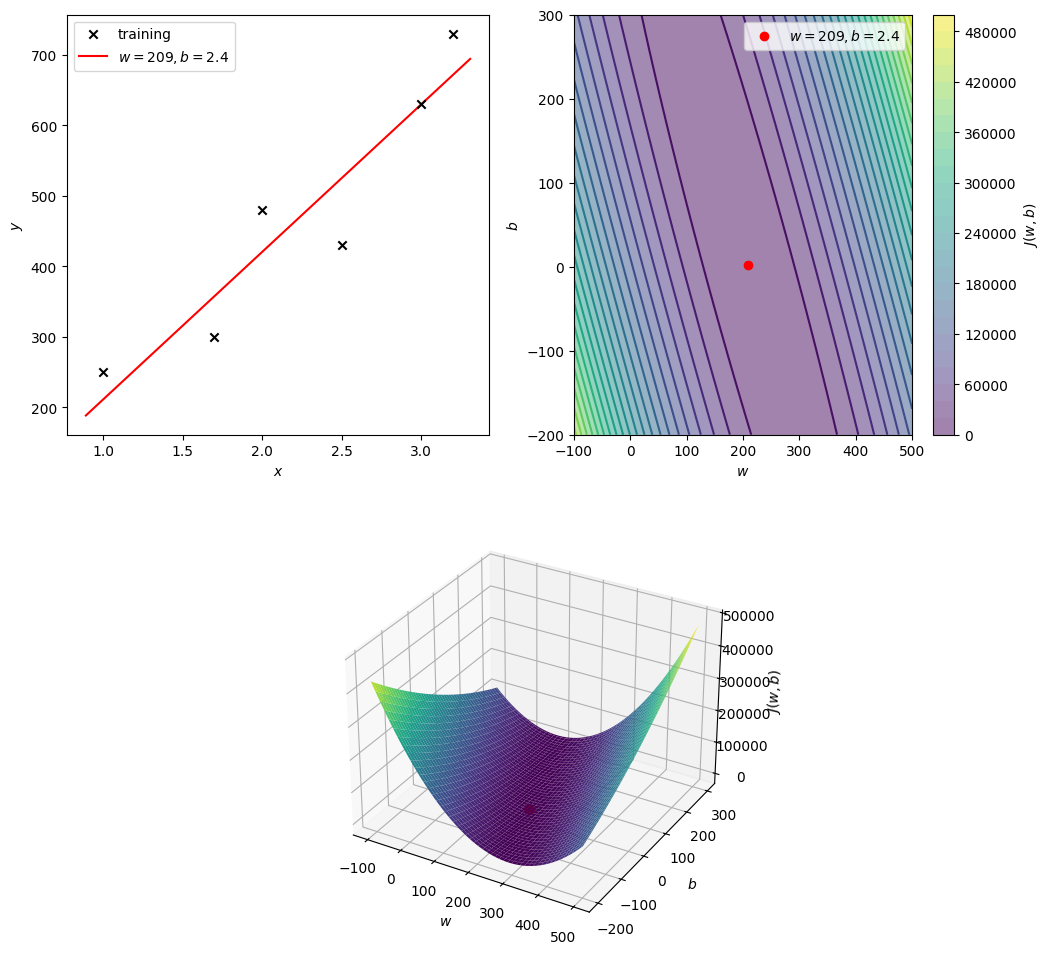

In [6]:
x_train = np.array([1.0, 1.7, 2.0, 2.5, 3.0, 3.2])
y_train = np.array(
    [
        250,
        300,
        480,
        430,
        630,
        730,
    ]
)

w = 209
b = 2.4
w_min, w_max = -100, 500
b_min, b_max = -200, 300


def J_w_b(x: np.ndarray, y: np.ndarray, w: float, b: float) -> float:
    """Get cost function value for line with weight w, and bias b."""
    squared_diff = np.square(x * w + b - y)
    return (1 / (2 * x.shape[0])) * np.sum(squared_diff, axis=0)


def J_w_b_vectorized(
    x: np.ndarray, y: np.ndarray, w: np.ndarray, b: np.ndarray
) -> np.ndarray:
    """
    Get cost function values for all combinations of a vector of weights, w,
    and a vector of biases, b.
    """
    predictions = x[:, None, None] * w[None, :, None] + b[None, None, :]
    squared_diff = np.square(predictions - y[:, None, None])
    return (1 / (2 * x.shape[0])) * np.sum(squared_diff, axis=0)


# set up axes
fig, axes = plt.subplot_mosaic(
    [["ax_topleft", "ax_topright"], ["ax_bottom", "ax_bottom"]], figsize=(12, 12)
)
ax_topleft = axes["ax_topleft"]
ax_topright = axes["ax_topright"]
ax_bottom_2d = axes["ax_bottom"]
ax_bottom_2d.remove()
ax_bottom = fig.add_subplot(2, 1, 2, projection="3d")

# Top Left: y(x) plot
ax_topleft.scatter(x=x_train, y=y_train, marker="x", color="k", label="training")
pred_x = np.array(ax_topleft.get_xlim())
pred_y = w * pred_x + b
ax_topleft.plot(pred_x, pred_y, color="r", label=f"$w={w}, b={b}$", zorder=0)
ax_topleft.legend()
ax_topleft.set_xlabel("$x$")
ax_topleft.set_ylabel("$y$")

# Top right: J(w, b) contour plot
W = np.linspace(w_min, w_max, 100)
B = np.linspace(b_min, b_max, 100)
grid = np.meshgrid(W, B)
J = J_w_b_vectorized(x_train, y_train, W, B)
levels = np.linspace(0, 500000, 26)
ax_topright.contour(*grid, J.T, levels=levels, cmap="viridis")
cf = ax_topright.contourf(
    *grid, J.T, levels=levels, cmap="viridis", alpha=0.5, zorder=0
)
fig.colorbar(cf, label="$J(w, b)$")
ax_topright.scatter(w, b, color="r", label=f"$w={w}, b={b}$", zorder=0)
ax_topright.legend()
ax_topright.set_xlabel("$w$")
ax_topright.set_ylabel("$b$")

# Bottom: J(w, b) 3D surface plot
surface = ax_bottom.plot_surface(*grid, J.T, cmap="viridis", zorder=0)
ax_bottom.scatter(w, b, J_w_b(x_train, y_train, w, b), marker="o", color="r", s=50)
ax_bottom.set(xlabel="$w$", ylabel="$b$", zlabel="$J(w,b)$")

### Gradient Descent

One common method to find the parameters for finding the parametes that give the
smallest cost is **gradient descent**. This is even used in advanced models,
such as *deep learning* models.

Note that the technique of gradient descent applies to any number of dimensions,
*i.e.* we can have a vector or weights:
$$\boldsymbol{w} = (w_1, w_2, ..., w_n)$$
and we want to find:
$$\underset{\boldsymbol{w}, b}{\text{min}}\;J(\boldsymbol{w},b)$$

Note that gradient descent might find a **local minimum** instead of a **global
minimum** for more complex *shapes* of $J(\boldsymbol{w},b)$.

It is typical to assume a starting point of zero for $w$ and $b$.

**Gradient descent algorithm**:

$$w \leftarrow w -\alpha\frac{\partial}{\partial w}J(w,b)$$
$$b \leftarrow b -\alpha\frac{\partial}{\partial b}J(w,b)$$

The parameter $\alpha$ is known as the **learning rate**.

The partial derivatives of $J(w, b)$ give the required direction of travel.

A crucial detail of the algorithm is that $w$ and $b$ must be updated
simultaneously. If, for instance, we update $w$ first, then this will
affect the calculation of $b$. This must be carefully considered when
implementing the algorithm.

For instance, we could implement as:

$$w_{temp}\leftarrow w - \alpha\frac{\partial}{\partial w}J(w,b)$$
$$b_{temp}\leftarrow b - \alpha\frac{\partial}{\partial b}J(w,b)$$
$$w\leftarrow w_{temp}$$
$$w\leftarrow w_{temp}$$

If the learning rate is too small, it may take too long to find a minimum. If
it is too large, there may be instability around a minimum, or it may diverge.

### Gradient Descent for Linear Regression

To apply gradient descent for linear regression, we need to put our linear
regression cost function, $J(w, b)$, into our gradient descent algorithm.
We can calculate the partial derivatives as follows:
$$J(w, b) = \frac{1}{2m}\sum_{i=1}^{m}(f_{(w,b)}(x^{(i)}) - y^{(i)})^2$$
$$\frac{\partial}{\partial w}J(w,b) = \frac{\partial}{\partial w}\frac{1}{2m}
\sum_{i=1}^{m}(f_{(w,b)}(x^{(i)}) - y^{(i)})^2$$
recall $f_{(w,b)}(x^{(i)}) = wx^{(i)} + b$, so:
$$\frac{\partial}{\partial w}J(w,b) = \frac{\partial}{\partial w}\frac{1}{2m}
\sum_{i=1}^{m}(wx^{(i)} + b - y^{(i)})^2$$
taking the derivative gives:
$$\frac{\partial}{\partial w}J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)} + b
- y^{(i)})x^{i}$$
Substituting back in using $f_{(w,b)}(x^{(i)}) = wx^{(i)} + b$ gives:
$$\frac{\partial}{\partial w}J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(f_{(w,b)}
(x^{(i)}) - y^{(i)})x^{i}$$

We can take a similar approach with the other derivative:
$$\frac{\partial}{\partial b}J(w,b) = \frac{\partial}{\partial b}\frac{1}{2m}
\sum_{i=1}^{m}(f_{(w,b)}(x^{(i)}) - y^{(i)})^2$$
$$\frac{\partial}{\partial b}J(w,b) = \frac{\partial}{\partial b}\frac{1}{2m}
\sum_{i=1}^{m}(wx^{(i)} + b - y^{(i)})^2$$
taking the derivative gives:
$$\frac{\partial}{\partial b}J(w,b) = \frac{1}{m}\sum_{i=1}^{m}(wx^{(i)} + b
 - y^{(i)})$$

Now we can substititute these expressions into our linear regression algorithm:

repeat until convergence {
$$w \leftarrow w - \alpha\frac{1}{m}\sum_{i=1}^{m}(f_{(w,b)}(x^{(i)})
- y^{(i)})x^{i}$$

$$b\leftarrow b - \alpha\frac{1}{m}\sum_{i=1}^{m}(wx^{(i)} + b - y^{(i)})$$
}

Note that the squared errror cost function is always **convex** so the issue of
finding a *local*, but not *global*, minimum does not arise. Once a suitable
learning rate is selected, convergence will occur.

We typically perform **batch** gradient descent, which simply means that we use
all of the training data to inform each evaluation of the cost function. An
alternative is to use smaller subsets of training data.

TODO: Gradient descent algorithm and plots; also showing visually the effect of
learning rate.


In [ ]:
def gradient(
    x: np.ndarray, y: np.ndarray, w: float, b: float
) -> tuple[np.float64, np.float64]:
    """Compute the gradients ∂j/∂w and ∂j/∂b."""
    m = x.shape[0]
    dj_dw = np.sum((w * x + b - y) * x) / m
    dj_db = np.sum(w * x + b - y) / m
    return dj_dw, dj_db


def cost(x: np.ndarray, y: np.ndarray, w: float, b: float) -> np.float64:
    """Compute the mean square error cost, J(w, b), of a linear regression."""
    return np.sum(np.square(w * x + b - y)) / 2 / x.shape[0]


def gradient_descent_single(
    x: np.ndarray,
    y: np.ndarray,
    w: float,
    b: float,
    alpha: float,
) -> tuple[float, float]:
    """Perform one iteration of gradient descent."""
    dj_dw, dj_db = gradient(x, y, w, b)
    w = w - alpha * dj_dw
    b = b - alpha * dj_db
    return w, b


def gradient_descent(
    x: np.ndarray, y: np.ndarray, w0: float, b0: float, alpha: float, max_iters: float
) -> tuple[float, float]:
    """Perform iterative gradient descent."""
    w, b = w0, b0
    for _ in range(max_iters):
        w, b = gradient_descent_single(x, y, w, b, alpha)
    return w, b

We can use the code above to perform a linear regression on some sample data. Note the effects of varying the learning rate;
if it is too large, the instability occurs rapidly.

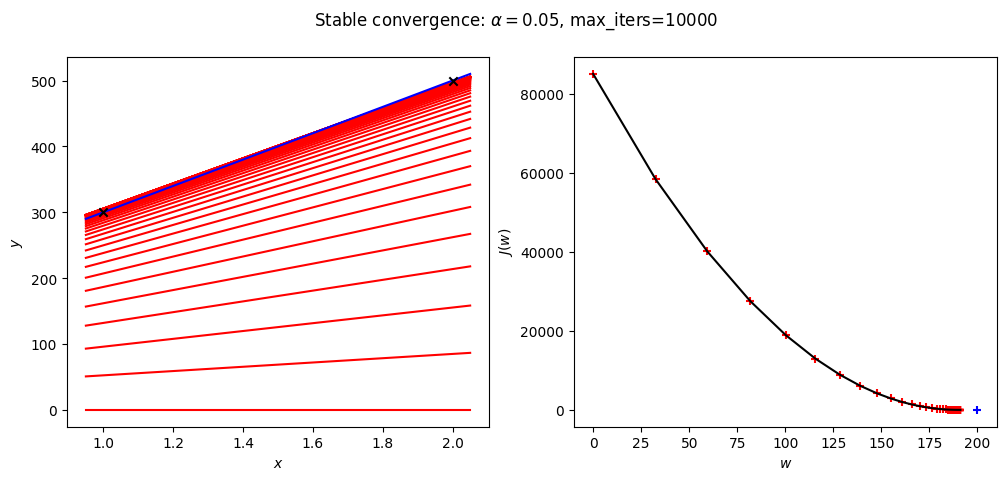

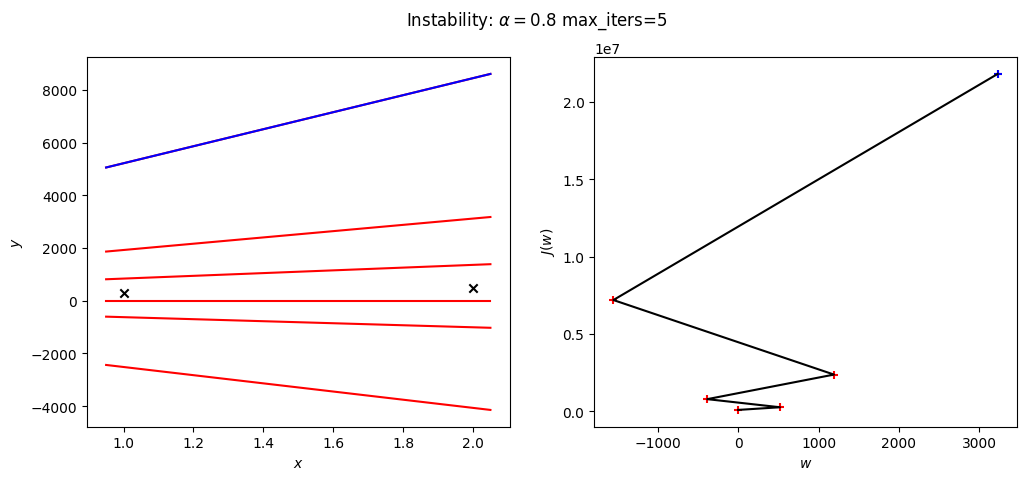

In [ ]:
def gradient_descent_with_history(
    x: np.ndarray, y: np.ndarray, w0: float, b0: float, alpha: float, max_iters: float
) -> tuple[np.ndarray, np.ndarray, np.ndarray]:
    """Perform iterative gradient descent, returning all intermediate values."""
    w, b = w0, b0
    w_history = [w]
    b_history = [b]
    costs_history = [cost(x, y, w, b)]
    for _ in range(max_iters):
        w, b = gradient_descent_single(x, y, w, b, alpha)
        w_history.append(w)
        b_history.append(b)
        costs_history.append(cost(x, y, w, b))
    return np.array(w_history), np.array(b_history), np.array(costs_history)


def plot_gradient_descent(x, y, w, b, J, n, title=None):
    fig, axs = plt.subplots(nrows=1, ncols=2)
    axs[0].scatter(x=x, y=y, marker="x", color="k", label="actual")
    pred_x = np.array(axs[0].get_xlim())
    for i in range(n):
        pred_y = w[i] * pred_x + b[i]
        axs[0].plot(pred_x, pred_y, color="r", zorder=0)
    pred_y = w[-1] * pred_x + b[-1]
    axs[0].plot(pred_x, pred_y, color="b", zorder=0)
    axs[1].plot(w[:n], J[:n], color="k")
    axs[1].scatter(x=w[:n], y=J[:n], marker="+", color="r")
    axs[1].scatter(x=w[-1], y=J_w_b(x, y, w[-1], b[-1]), marker="+", color="b")
    fig.set_figwidth(12)
    axs[0].set_xlabel("$x$")
    axs[0].set_ylabel("$y$")
    axs[1].set_xlabel("$w$")
    axs[1].set_ylabel("$J(w)$")
    if title is not None:
        fig.suptitle(title)


x = np.array([1.0, 2.0])  # features
y = np.array([300.0, 500.0])  # target value

alpha = 0.05
max_iters = 10000
w, b, J = gradient_descent_with_history(x, y, 0, 0, alpha, max_iters)
plot_gradient_descent(
    x, y, w, b, J, n=50, title=f"Stable convergence: $α={alpha}$, max_iters={max_iters}"
)

alpha = 0.8
max_iters = 5
w, b, J = gradient_descent_with_history(x, y, 0, 0, alpha, max_iters)
plot_gradient_descent(
    x,
    y,
    w,
    b,
    J,
    n=max_iters + 1,
    title=f"Instability: $α={alpha}$ max_iters={max_iters}",
)